In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

/Users/zhangjianfeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
NUM_WORDS = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [9]:
train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
len(train_data[0])

10000

In [12]:
len(train_data)

25000

In [13]:
train_data.shape

(25000, 10000)

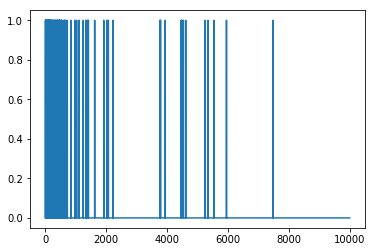

In [14]:
plt.plot(train_data[0])

In [20]:
#创建基准模型
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [21]:
baseline_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

In [22]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [23]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data,test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.4764 - acc: 0.8144 - binary_crossentropy: 0.4764 - val_loss: 0.3295 - val_acc: 0.8746 - val_binary_crossentropy: 0.3295
Epoch 2/20
 - 2s - loss: 0.2399 - acc: 0.9118 - binary_crossentropy: 0.2399 - val_loss: 0.2842 - val_acc: 0.8866 - val_binary_crossentropy: 0.2842
Epoch 3/20
 - 2s - loss: 0.1749 - acc: 0.9381 - binary_crossentropy: 0.1749 - val_loss: 0.2937 - val_acc: 0.8837 - val_binary_crossentropy: 0.2937
Epoch 4/20
 - 2s - loss: 0.1402 - acc: 0.9521 - binary_crossentropy: 0.1402 - val_loss: 0.3221 - val_acc: 0.8780 - val_binary_crossentropy: 0.3221
Epoch 5/20
 - 2s - loss: 0.1170 - acc: 0.9612 - binary_crossentropy: 0.1170 - val_loss: 0.3494 - val_acc: 0.8720 - val_binary_crossentropy: 0.3494
Epoch 6/20
 - 2s - loss: 0.0971 - acc: 0.9700 - binary_crossentropy: 0.0971 - val_loss: 0.3823 - val_acc: 0.8690 - val_binary_crossentropy: 0.3823
Epoch 7/20
 - 2s - loss: 0.0811 - acc: 0.9766 - binary_crossentropy:

In [24]:
#创建一个更小的模型
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [25]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6035 - acc: 0.7041 - binary_crossentropy: 0.6035 - val_loss: 0.5369 - val_acc: 0.8016 - val_binary_crossentropy: 0.5369
Epoch 2/20
 - 2s - loss: 0.4866 - acc: 0.8522 - binary_crossentropy: 0.4866 - val_loss: 0.4916 - val_acc: 0.8402 - val_binary_crossentropy: 0.4916
Epoch 3/20
 - 2s - loss: 0.4382 - acc: 0.8958 - binary_crossentropy: 0.4382 - val_loss: 0.4675 - val_acc: 0.8675 - val_binary_crossentropy: 0.4675
Epoch 4/20
 - 2s - loss: 0.4042 - acc: 0.9186 - binary_crossentropy: 0.4042 - val_loss: 0.4553 - val_acc: 0.8710 - val_binary_crossentropy: 0.4553
Epoch 5/20
 - 2s - loss: 0.3774 - acc: 0.9333 - binary_crossentropy: 0.3774 - val_loss: 0.4460 - val_acc: 0.8772 - val_binary_crossentropy: 0.4460
Epoch 6/20
 - 2s - loss: 0.3545 - acc: 0.9451 - binary_crossentropy: 0.3545 - val_loss: 0.4440 - val_acc: 0.8739 - val_binary_crossentropy: 0.4440
Epoch 7/20
 - 2s - loss: 0.3340 - acc: 0.9534 - binary_crossentropy:

In [26]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [27]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.3430 - acc: 0.8571 - binary_crossentropy: 0.3430 - val_loss: 0.2932 - val_acc: 0.8808 - val_binary_crossentropy: 0.2932
Epoch 2/20
 - 7s - loss: 0.1350 - acc: 0.9512 - binary_crossentropy: 0.1350 - val_loss: 0.3547 - val_acc: 0.8646 - val_binary_crossentropy: 0.3547
Epoch 3/20
 - 7s - loss: 0.0425 - acc: 0.9879 - binary_crossentropy: 0.0425 - val_loss: 0.4491 - val_acc: 0.8670 - val_binary_crossentropy: 0.4491
Epoch 4/20
 - 7s - loss: 0.0072 - acc: 0.9991 - binary_crossentropy: 0.0072 - val_loss: 0.6158 - val_acc: 0.8700 - val_binary_crossentropy: 0.6158
Epoch 5/20
 - 7s - loss: 8.3706e-04 - acc: 1.0000 - binary_crossentropy: 8.3706e-04 - val_loss: 0.6957 - val_acc: 0.8694 - val_binary_crossentropy: 0.6957
Epoch 6/20
 - 7s - loss: 2.1990e-04 - acc: 1.0000 - binary_crossentropy: 2.1990e-04 - val_loss: 0.7335 - val_acc: 0.8700 - val_binary_crossentropy: 0.7335
Epoch 7/20
 - 7s - loss: 1.3344e-04 - acc: 1.0000 - 

In [28]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  plt.xlim([0,max(history.epoch)])

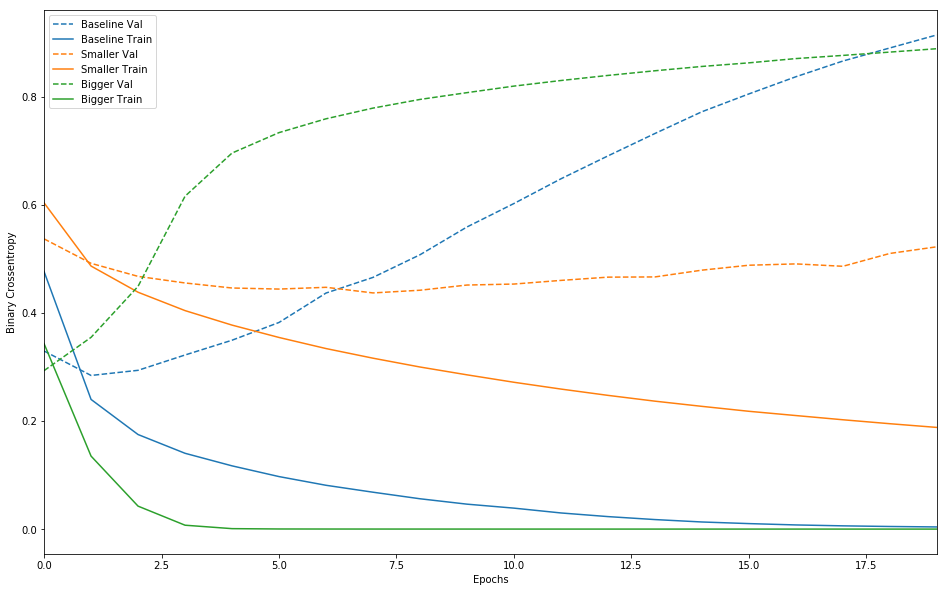

In [29]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [31]:
#正则化，L1，代价与权重系数哦的绝对值成正比
#L2，代价与权重系数值的平方成正比，就是权重衰减

In [33]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [34]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [35]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5667 - acc: 0.7939 - binary_crossentropy: 0.5327 - val_loss: 0.4169 - val_acc: 0.8709 - val_binary_crossentropy: 0.3832
Epoch 2/20
 - 2s - loss: 0.3307 - acc: 0.9022 - binary_crossentropy: 0.2919 - val_loss: 0.3370 - val_acc: 0.8878 - val_binary_crossentropy: 0.2935
Epoch 3/20
 - 2s - loss: 0.2670 - acc: 0.9230 - binary_crossentropy: 0.2201 - val_loss: 0.3308 - val_acc: 0.8871 - val_binary_crossentropy: 0.2814
Epoch 4/20
 - 2s - loss: 0.2361 - acc: 0.9369 - binary_crossentropy: 0.1849 - val_loss: 0.3388 - val_acc: 0.8848 - val_binary_crossentropy: 0.2864
Epoch 5/20
 - 2s - loss: 0.2204 - acc: 0.9435 - binary_crossentropy: 0.1665 - val_loss: 0.3520 - val_acc: 0.8807 - val_binary_crossentropy: 0.2972
Epoch 6/20
 - 2s - loss: 0.2070 - acc: 0.9501 - binary_crossentropy: 0.1515 - val_loss: 0.3631 - val_acc: 0.8785 - val_binary_crossentropy: 0.3072
Epoch 7/20
 - 2s - loss: 0.1996 - acc: 0.9524 - binary_crossentropy:

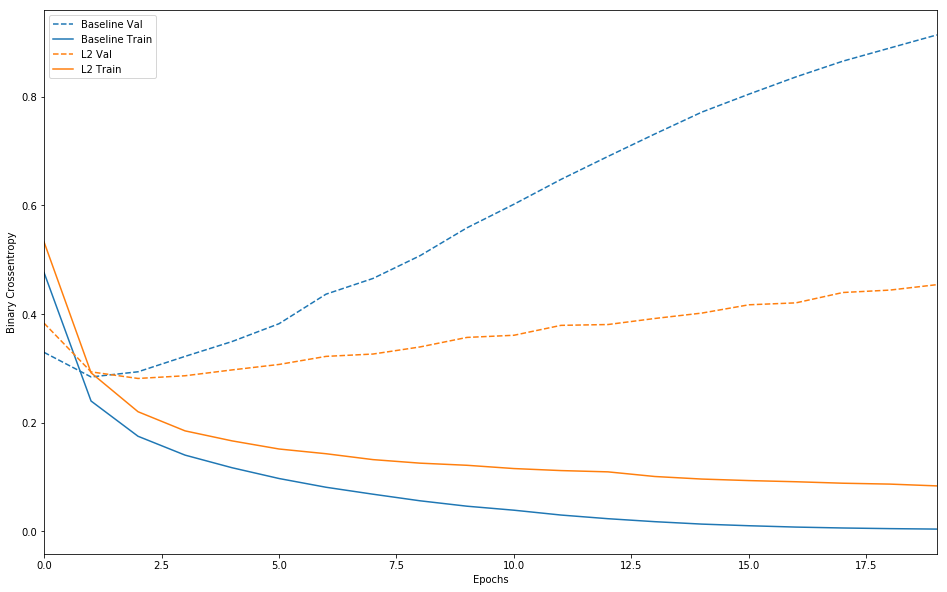

In [36]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [37]:
# l2(0.001) 表示层的权重矩阵中的每个系数都会将 0.001 * weight_coefficient_value**2 添加到网络的总损失中。

In [38]:
#添加丢弃层

In [39]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [40]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [41]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6389 - acc: 0.6200 - binary_crossentropy: 0.6389 - val_loss: 0.5330 - val_acc: 0.8488 - val_binary_crossentropy: 0.5330
Epoch 2/20
 - 2s - loss: 0.4968 - acc: 0.7856 - binary_crossentropy: 0.4968 - val_loss: 0.3774 - val_acc: 0.8800 - val_binary_crossentropy: 0.3774
Epoch 3/20
 - 2s - loss: 0.3868 - acc: 0.8522 - binary_crossentropy: 0.3868 - val_loss: 0.3008 - val_acc: 0.8891 - val_binary_crossentropy: 0.3008
Epoch 4/20
 - 2s - loss: 0.3145 - acc: 0.8896 - binary_crossentropy: 0.3145 - val_loss: 0.2783 - val_acc: 0.8897 - val_binary_crossentropy: 0.2783
Epoch 5/20
 - 2s - loss: 0.2592 - acc: 0.9080 - binary_crossentropy: 0.2592 - val_loss: 0.2762 - val_acc: 0.8888 - val_binary_crossentropy: 0.2762
Epoch 6/20
 - 2s - loss: 0.2310 - acc: 0.9221 - binary_crossentropy: 0.2310 - val_loss: 0.2848 - val_acc: 0.8879 - val_binary_crossentropy: 0.2848
Epoch 7/20
 - 3s - loss: 0.2024 - acc: 0.9323 - binary_crossentropy:

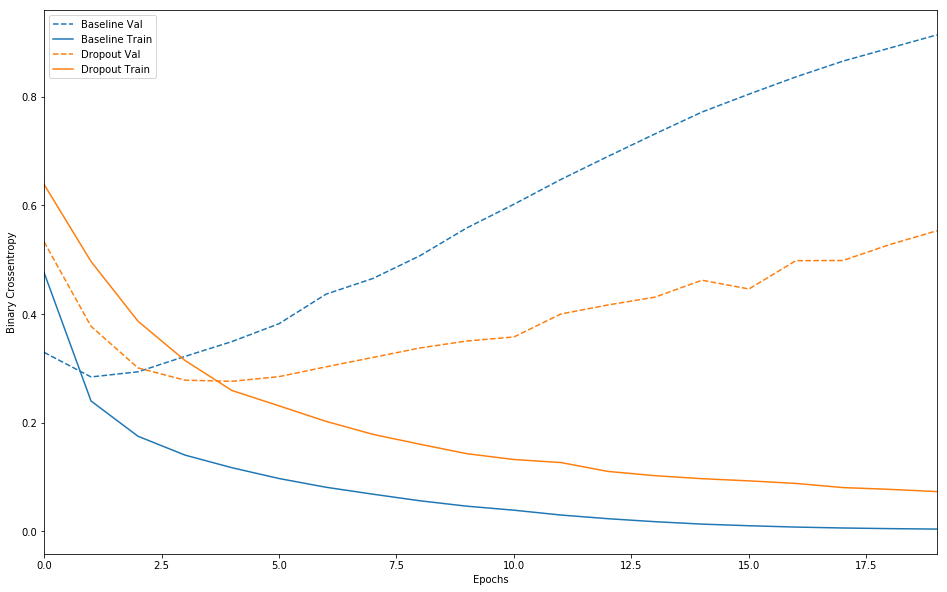

In [42]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [45]:
'''
添加丢弃层可明显改善基准模型。
下面总结一下防止神经网络出现过拟合的最常见方法:
获取更多训练数据。
降低网络容量。
添加权重正则化。
添加丢弃层。
'''

'\n添加丢弃层可明显改善基准模型。\n下面总结一下防止神经网络出现过拟合的最常见方法:\n获取更多训练数据。\n降低网络容量。\n添加权重正则化。\n添加丢弃层。\n'